In [1]:
import torch
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from torchmetrics.functional import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [2]:
train = pd.read_csv('data/AAPL/1d_train.csv')
val = pd.read_csv('data/AAPL/1d_val.csv')
test = pd.read_csv('data/AAPL/1d_test.csv')
train = pd.concat([train, val])
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [3]:
train = train.rename(columns={'datetime': 'ds', 'close': 'y'})
test = test.rename(columns={'datetime': 'ds', 'close': 'y'})

In [4]:
model = Prophet()
model.fit(train[['ds', 'y']])

14:47:10 - cmdstanpy - INFO - Chain [1] start processing
14:47:11 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
forecast = model.predict(test[['ds']])
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
734,2024-09-25,290.848159,247.738518,332.496917
735,2024-09-26,290.900947,249.681379,330.900459
736,2024-09-27,290.912279,248.677759,332.590565
737,2024-09-30,291.340943,249.251470,332.748384
738,2024-10-01,291.514133,249.443520,332.459301


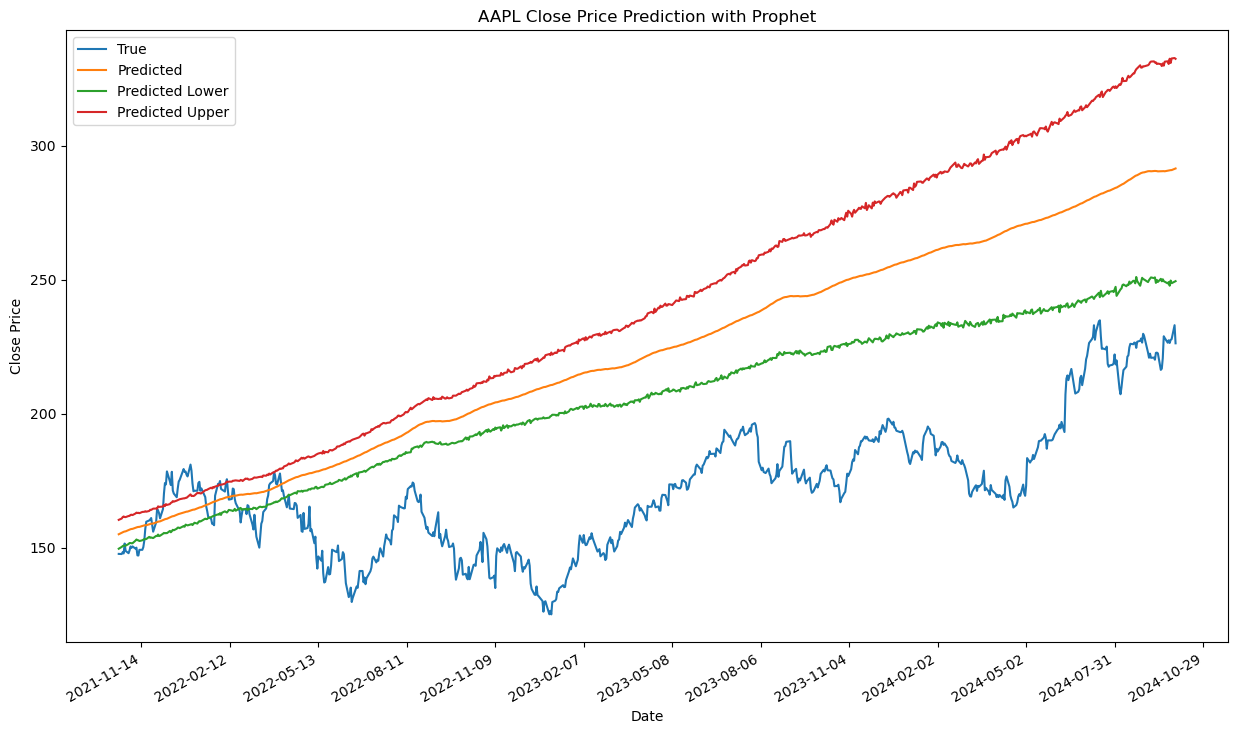

In [6]:
fig = plt.figure(facecolor='w', figsize=(15, 9))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Close Price Prediction with Prophet')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))
plt.plot(test['ds'], test['y'], label='True')
plt.plot(test['ds'], forecast['yhat'], label='Predicted')
plt.plot(test['ds'], forecast['yhat_lower'], label='Predicted Lower')
plt.plot(test['ds'], forecast['yhat_upper'], label='Predicted Upper')
plt.gcf().autofmt_xdate()
plt.legend()

In [7]:
true = torch.tensor(test['y'].values)
pred = torch.tensor(forecast['yhat'].values)
print(pred.shape, true.shape)

torch.Size([739]) torch.Size([739])


In [8]:
print(f'MAE: {mean_absolute_error(pred, true)}')
print(f'MSE: {mean_squared_error(pred, true)}')
print(f'MAPE: {mean_absolute_percentage_error(pred, true)}')

MAE: 51.89357129941536
MSE: 3362.882787183135
MAPE: 0.30403081115767205
